<a href="https://colab.research.google.com/github/MAHFUZUR-RAHMANsoft/CVPR/blob/main/ResNet50v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
import random
import itertools
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib as mpl
from keras import backend
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import decode_predictions, preprocess_input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths and labels
labels = ['fake', 'real']
train_path = '/content/drive/MyDrive/Training/Money_image/Train'
valid_path = '/content/drive/MyDrive/Training/Money_image/Valid'
test_path = '/content/drive/MyDrive/Training/Money_image/Test'

# Preprocess images using ResNet-50 v2 preprocessing
input_shape = (224, 224, 3)
batch_size = 10

# Create data generators
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input
)
train_batches = train_datagen.flow_from_directory(
    directory=train_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical'
)

valid_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input
)
valid_batches = valid_datagen.flow_from_directory(
    directory=valid_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical'
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input
)
test_batches = test_datagen.flow_from_directory(
    directory=test_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False
)

# Load the ResNet-50 v2 model
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(len(labels), activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Freeze the layers in the base ResNet-50 v2 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()




Found 92 images belonging to 2 classes.
Found 92 images belonging to 2 classes.
Found 92 images belonging to 2 classes.
Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_11[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                     

In [ ]:
# Train the model
num_epochs = 10
history = model.fit(
    train_batches,
    steps_per_epoch=len(train_batches),
    epochs=num_epochs,
    validation_data=valid_batches,
    validation_steps=len(valid_batches)
)

Epoch 1/10
10/10 [==============================] - 36s 3s/step - loss: 0.4637 - accuracy: 0.7935 - val_loss: 0.2579 - val_accuracy: 0.9783
Epoch 2/10
10/10 [==============================] - 36s 4s/step - loss: 0.1896 - accuracy: 0.9783 - val_loss: 0.1129 - val_accuracy: 0.9783
Epoch 3/10
10/10 [==============================] - 36s 4s/step - loss: 0.0962 - accuracy: 0.9783 - val_loss: 0.0785 - val_accuracy: 0.9783
Epoch 4/10
10/10 [==============================] - 37s 4s/step - loss: 0.0726 - accuracy: 0.9783 - val_loss: 0.0640 - val_accuracy: 0.9783
Epoch 5/10
10/10 [==============================] - 36s 4s/step - loss: 0.0619 - accuracy: 0.9783 - val_loss: 0.0580 - val_accuracy: 0.9783
Epoch 6/10
10/10 [==============================] - 36s 4s/step - loss: 0.0558 - accuracy: 0.9783 - val_loss: 0.0511 - val_accuracy: 0.9783
Epoch 7/10
10/10 [==============================] - 36s 4s/step - loss: 0.0480 - accuracy: 0.9783 - val_loss: 0.0450 - val_accuracy: 0.9783
Epoch 8/10
10/10 [==

In [ ]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix, precision_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
model = tf.keras.models.load_model("fine_tuned_Money_detection_model")



In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input)
test_batches = test_datagen.flow_from_directory(
    directory=test_path, target_size=(224, 224), batch_size=10, class_mode='categorical', shuffle=False
)
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
predicted_classes = np.argmax(predictions, axis=1)

Found 92 images belonging to 2 classes.


In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=predicted_classes)
precision = precision_score(y_true=test_labels, y_pred=predicted_classes)
f1 = f1_score(y_true=test_labels, y_pred=predicted_classes)
accuracy = accuracy_score(y_true=test_labels, y_pred=predicted_classes)

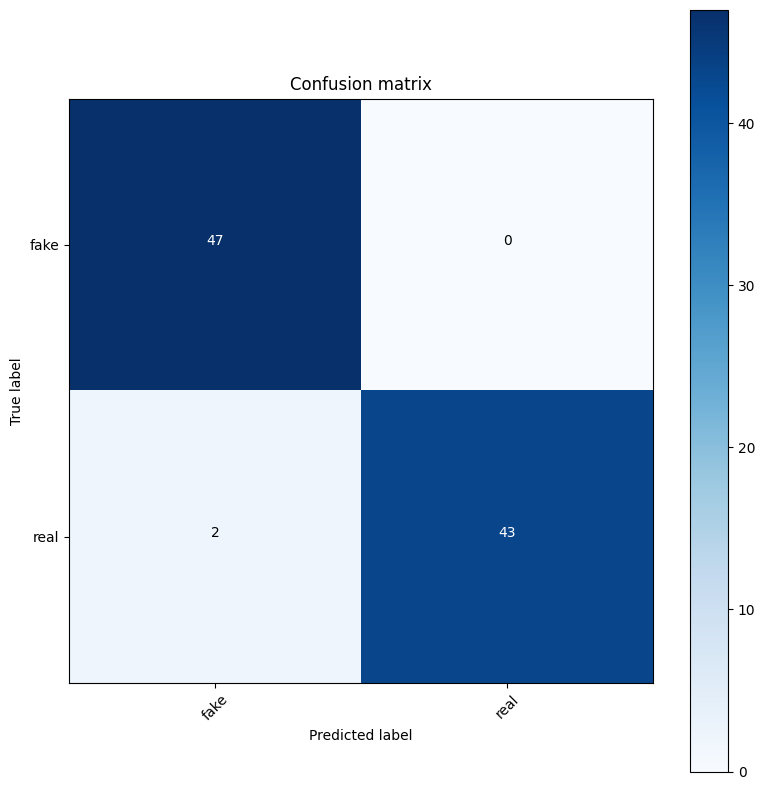

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 1.0000
F1 Score: 0.9773
Accuracy: 0.9783


In [ ]:
def preprocess_image(file):
    img_path = '/content/drive/MyDrive/Training/Money_image/Test/Real/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.resnet_v2.preprocess_input(img_array_expanded_dims)


In [ ]:
model = tf.keras.models.load_model("fine_tuned_Money_detection_model")

In [ ]:
image_file = "mahfuz.jpg"  # Replace with the actual image file
preprocessed_image = preprocess_image(image_file)

In [ ]:
prediction = model.predict(preprocessed_image)
predicted_class = np.argmax(prediction)

1/1 [==============================] - 1s 1s/step


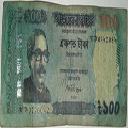

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/Training/Money_image/Test/Real/mahfuz.jpg'
display(Image(filename=image_path, width=300, height=200))

In [ ]:
print("Predicted class:", labels[predicted_class])


Predicted class: real


In [ ]:
image_file = "mahfuz.jpg"  # Replace with the actual image file
preprocessed_image = preprocess_image(image_file)


In [ ]:
prediction = model.predict(preprocessed_image)
predicted_class = np.argmax(prediction)

1/1 [==============================] - 0s 204ms/step


In [ ]:
predictions

array([[0.8806555 , 0.11934445],
       [0.8806555 , 0.11934445],
       [0.8806555 , 0.11934445],
       [0.8806555 , 0.11934445],
       [0.8806555 , 0.11934445],
       [0.9955047 , 0.00449534],
       [0.9955047 , 0.00449534],
       [0.9955047 , 0.00449534],
       [0.9955047 , 0.00449534],
       [0.9955047 , 0.00449534],
       [0.9955047 , 0.00449534],
       [0.9955047 , 0.00449534],
       [0.9955047 , 0.00449534],
       [0.9955047 , 0.00449534],
       [0.9955047 , 0.00449534],
       [0.9955047 , 0.00449534],
       [0.9955047 , 0.00449534],
       [0.9955047 , 0.00449534],
       [0.9955047 , 0.00449534],
       [0.9903244 , 0.00967565],
       [0.9955047 , 0.00449534],
       [0.99032426, 0.00967565],
       [0.99032426, 0.00967565],
       [0.99032426, 0.00967565],
       [0.99032426, 0.00967565],
       [0.99032426, 0.00967565],
       [0.99032426, 0.00967565],
       [0.99032426, 0.00967565],
       [0.9903244 , 0.00967565],
       [0.9903244 , 0.00967565],
       [0.

In [ ]:
labels = ['fake', 'real']
predicted_label = labels[predicted_class]
print("Predicted class:", predicted_label)

Predicted class: real


In [ ]:
model = tf.keras.models.load_model("fine_tuned_Money_detection_model")


In [ ]:
# Define callbacks
history_callback = model.fit(
    train_batches,
    steps_per_epoch=len(train_batches),
    epochs=10,
    validation_data=valid_batches,
    validation_steps=len(valid_batches)
)

Epoch 1/10
10/10 [==============================] - 46s 4s/step - loss: 0.0473 - accuracy: 0.9783 - val_loss: 0.0316 - val_accuracy: 0.9783
Epoch 2/10
10/10 [==============================] - 36s 4s/step - loss: 0.0327 - accuracy: 1.0000 - val_loss: 0.0316 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 30s 3s/step - loss: 0.0252 - accuracy: 0.9891 - val_loss: 0.0260 - val_accuracy: 0.9783
Epoch 4/10
10/10 [==============================] - 38s 4s/step - loss: 0.0363 - accuracy: 0.9783 - val_loss: 0.0272 - val_accuracy: 0.9783
Epoch 5/10
10/10 [==============================] - 36s 4s/step - loss: 0.0236 - accuracy: 0.9891 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 36s 4s/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 36s 4s/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 8/10
10/10 [==

In [ ]:
# Access epoch and accuracy values from the history callback
epochs = history_callback.epoch
train_accuracy = history_callback.history['accuracy']
val_accuracy = history_callback.history['val_accuracy']

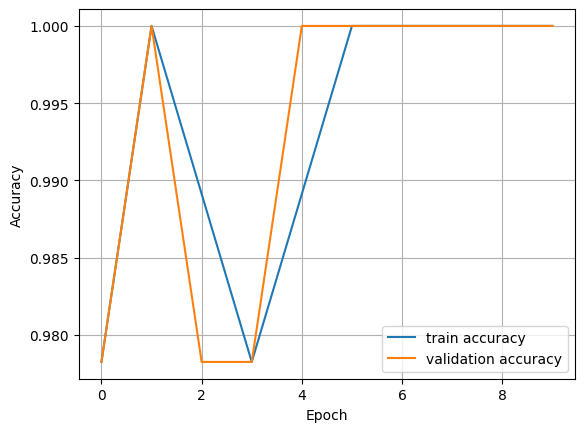

In [ ]:
plt.plot(epochs, train_accuracy, label='train accuracy')
plt.plot(epochs, val_accuracy, label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()



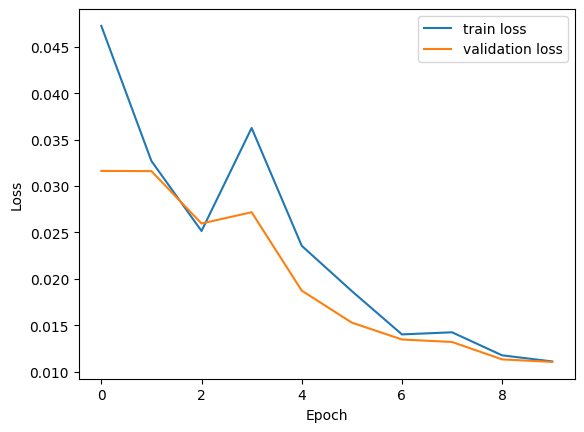

In [ ]:
# Access epoch and loss values from the history callback
epochs = history_callback.epoch
train_loss = history_callback.history['loss']
val_loss = history_callback.history['val_loss']

# Plot training and validation loss
plt.plot(epochs, train_loss, label='train loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()